Execution for house price estimation

In [1]:
# Import relevant files and libraries
import DataProcessor
import sys
import LRegression
import NLRegression
import performance_metrics
import Kmeans
import UserInterface

Define the parameters



In [2]:
# Allocate 80% of data to training
train_size = 0.8

# Identify features to be used
columnsToKeep = ['Price','Type','Bedroom','Bathroom','Car','Landsize','BuildingArea','Latitude','Longitude']
#columnsToKeep = ['Price', 'Bedroom', 'Bathroom']
#columnsToKeep = ['Price', 'Type', 'Landsize', 'BuildingArea']

# Path to dataset.
filepath = '../dataset/Melbourne_housing_FULL.csv'

# Identify prediction (ground truth)
prediction_column = 'Price'

Process raw data

Data Processor object created


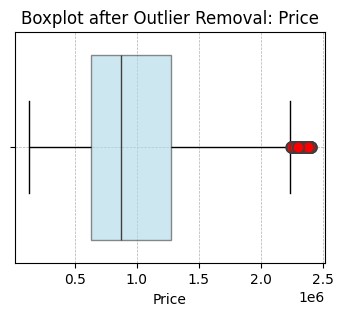

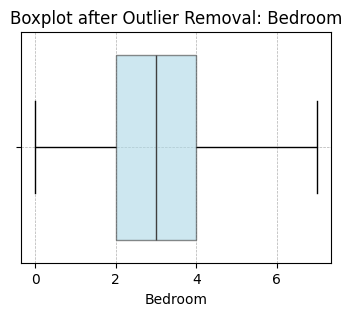

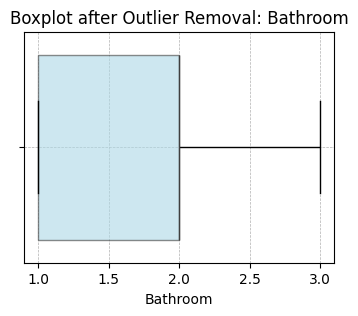

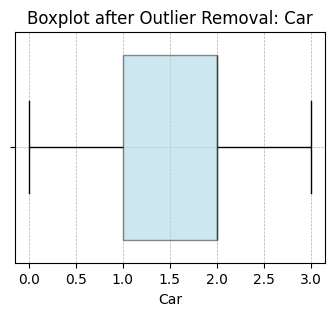

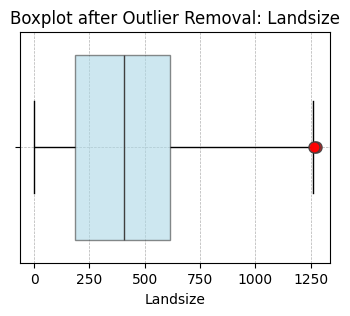

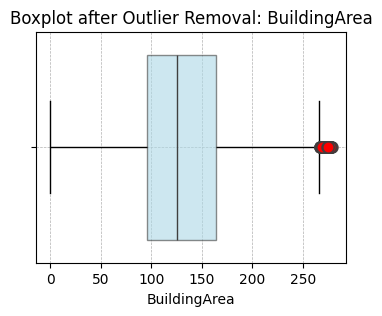

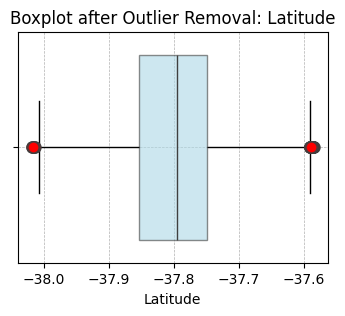

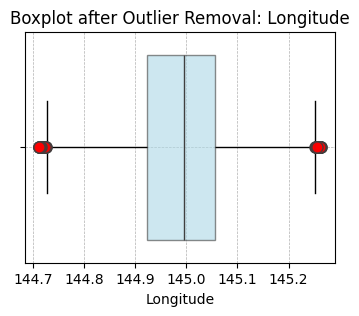

Number of rows removed: 1935
Number of rows remaining: 7438
training size 1600
test size 400


In [3]:
# Create a DataProcessor object and load the data
dp_obj = DataProcessor.DataProcessor()
dp_obj.LoadData(filepath)

# Remove incomplete points, remove unused features and shuffle the data
dp_obj.keepSelectedColumns(columnsToKeep)
dp_obj.filterData()

dp_obj.remove_outliers(columnsToKeep, plot=True)

# dp_obj.encodeCategoricalData(['Type'])
dp_obj.shuffleData()
dp_obj.reduceDataSize(2000) # remove this to train on the full dataset

# Split the data into training and testing
train_X, train_Y, test_X, test_Y = dp_obj.splitData(train_size, prediction_column)

# print(train_X.head())

# Remove dwelling type and additional landsize / building area data for some processing
clean_columns = ['Type', 'Landsize','BuildingArea']
train_X_clean = train_X.drop(columns=clean_columns,axis=1)
test_X_clean = test_X.drop(columns=clean_columns,axis=1)

K-Means Clustering

In [4]:
# Ashton
k = 5
pref = 'Size'
kmeans = Kmeans.Kmeans(train_X, train_Y, k, pref)

train_X, points, centroids = kmeans.cluster()

# Check the values returned
print("x_new:", train_X)
print("points:", points)
print("centroids:", centroids)

#plotKmean(train_X, points, centroids) 

x_new:      Type  Bedroom  Bathroom  Car  Landsize  BuildingArea  Latitude  \
1750    h      2.0       1.0  1.0     161.0         100.0 -37.72510   
843     h      3.0       1.0  1.0     270.0         218.0 -37.92624   
2       h      2.0       1.0  1.0     223.0          92.0 -37.80543   
1152    h      4.0       3.0  2.0     807.0         188.0 -37.99340   
988     h      2.0       1.0  0.0     152.0          87.0 -37.76110   
...   ...      ...       ...  ...       ...           ...       ...   
147     h      3.0       2.0  2.0     345.0         173.0 -37.80047   
703     h      2.0       2.0  1.0     176.0         142.0 -37.76930   
1277    h      3.0       2.0  2.0     466.0         160.0 -37.86210   
1609    h      3.0       2.0  1.0     156.0         124.0 -37.78980   
1430    h      4.0       3.0  2.0     212.0         192.0 -37.83187   

      Longitude   Size  AssignmentSize  
1750  144.86210  161.0               4  
843   145.13210  270.0               0  
2     144.89691  

Linear Regression

In [52]:
# TEMPORARY
k = 5
pref = 'Size'
km = kmeans.Kmeans(train_X_clean,train_Y,k,pref)

train_X, points, centroids = km.cluster()
print(train_X['Assignment'].shape)

AttributeError: 'Kmeans' object has no attribute 'Kmeans'

In [ ]:
lr = LRegression.LRegression()
for i in range(k):
    features = train_X[train_X['Assignment'] == i]
    features = features.drop('Assignment',axis=1)
    targets = train_Y[train_X['Assignment'] == i]
    y_pred = lr.LinearRegression(features=features,target=targets)
    print(y_pred)

In [ ]:
lr = LRegression.LRegression()
assignments = train_X['Assignment']
# features = train_X.drop('Assignment',axis=1)
features = train_X
models = lr.LinearReg(assignments,features,train_Y)

In [ ]:
# Train
lr = LRegression.LRegression()
y_pred = []
# for i in range(k):
#     y_pred.append(lr.LinReg(features=train_X,target=train_Y,assignment=i))
y_pred = lr.LinReg(features=train_X,target=train_Y,assignment=train_X['Assignment'])

In [ ]:
# Test


Non-Linear Regression (Gaussian Processing)

In [ ]:
# Train

# options: 'Type','Bedroom','Bathroom','Car','Size','Latitude','Longitude'
featuresToTrain = ['Size', 'Latitude', 'Longitude']

nlr = NLRegression.NLRegression(train_X, train_Y, test_X, test_Y, featuresToTrain)
nlr.train()

In [ ]:
# plotting predictions vs expected
nlr.plot()

In [ ]:
# Quick Test
nlr.evaluate()

In [ ]:
# slow but more accurate test
nlr.cross_validate()

Evaluation Metrics

Data Processor object created


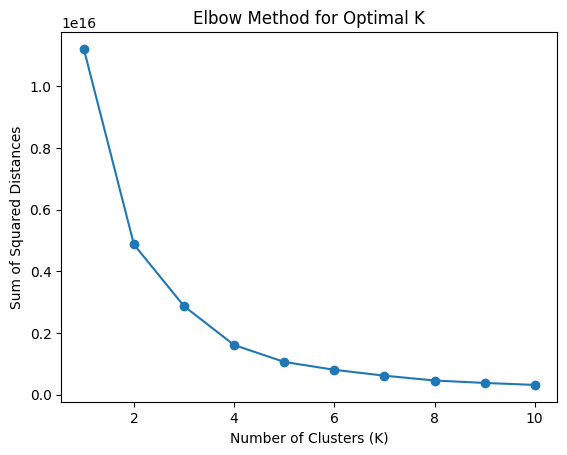

Optimal number of clusters: 1


In [5]:
from performance_metrics import ElbowMethod
from DataProcessor import DataProcessor
import pandas as pd
from sklearn.impute import SimpleImputer

# Identify features to be used (excluding 'Type')
columnsToKeep = ['Price', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Latitude', 'Longitude']

# Path to dataset
filepath = '../dataset/Melbourne_housing_FULL.csv'

# Step 1: Load and preprocess the data
data_processor = DataProcessor()
data = data_processor.LoadData(filepath)

# Drop columns that are not relevant or cannot be converted to numeric
data = data_processor.keepSelectedColumns(columnsToKeep)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 2: Use the ElbowMethod class with the preprocessed data
elbow_method = ElbowMethod(data)  # Initialize ElbowMethod
elbow_method.evaluate(max_clusters=10)
elbow_method.plot()
optimal_clusters = elbow_method.optimal_number_of_clusters()
print("Optimal number of clusters:", optimal_clusters)


In [6]:
from performance_metrics import calculate_silhouette_score
# Assuming kmeans.cluster() returns x_new, points, centroids
x_new, points, centroids = kmeans.cluster()
assignment = x_new['Assignment' + pref].values  # Extract the cluster assignments

silhouette_avg = calculate_silhouette_score(points, assignment)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5370538069283317


User input for preference

In [ ]:
# Calculate mean values if no user preference is provided
meanLand = dp_obj.getAverage('Landsize')
meanBuilding = dp_obj.getAverage('BuildingArea')

# Input user preferences
user_pref = UserInterface.UserInterface()
type, bedrooms, bathrooms, car, size, latitude, longitude = user_pref.Inputs(meanLand, meanBuilding)
print(type,bedrooms,bathrooms,car,size,latitude,longitude)

Final prediction

In [ ]:
# Return predicted value from best performing model
targets = [type,bedrooms,bathrooms,car,size,latitude,longitude]
pred = lr.predict(features=targets)